# Customer churn project

# Problem Statement:
    
You are the data scientist at a telecom company named “Neo” whose customers
are churning out to its competitors. You have to analyze the data of your
company and find insights and stop your customers from churning out to other
telecom companies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load the data
df = pd.read_csv(r"C:\Users\Dell\Downloads\customer_churn (1).csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Tasks To Be Performed:


# 1. Data Manipulation:

Extract the 5th column and store it in ‘customer_5’

In [ ]:
customer_5 = df.iloc[:,4]
customer_5

In [9]:
customer_5 = df.loc[:,"Dependents"]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

Extract the 15th column and store it in ‘customer_15’

In [12]:
customer_15 = df.iloc[:,[14]]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’

In [13]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [14]:
senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


 Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’

In [15]:
customer_total_tenure = df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’

In [17]:
two_mail_yes = df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [16]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333

In [23]:
customer_333 = df.sample(n=333,random_state=20)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3309,6061-PQHMK,Female,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.90,527.5,No
321,9880-TDQAC,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,60.00,4264,No
3289,9626-VFRGG,Female,0,No,Yes,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05,No
4187,2642-MAWLJ,Female,0,Yes,Yes,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.25,717.95,No
1675,6311-UEUME,Female,0,No,No,29,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,5356-RHIPP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes
3711,4877-TSOFF,Female,0,Yes,Yes,55,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),75.75,4264.25,No
3342,0384-LPITE,Male,0,No,No,40,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),62.05,2511.55,No
5496,2208-NKVVH,Male,0,Yes,Yes,43,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.25,1077.95,No


Get the count of different levels from the ‘Churn’ column

In [24]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# 2. Data Visualization:

In [26]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [28]:
x=df['InternetService'].value_counts().keys().tolist()
x

['Fiber optic', 'DSL', 'No']

In [29]:
y=df['InternetService'].value_counts().tolist()
y

[3096, 2421, 1526]

Text(0.5, 1.0, 'Distribution of Internet Service')

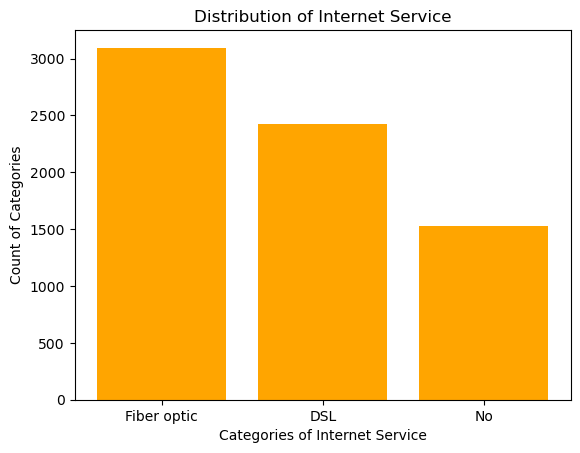

In [30]:
plt.bar(x,y,color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")

Text(0.5, 1.0, 'Distribution of tenure')

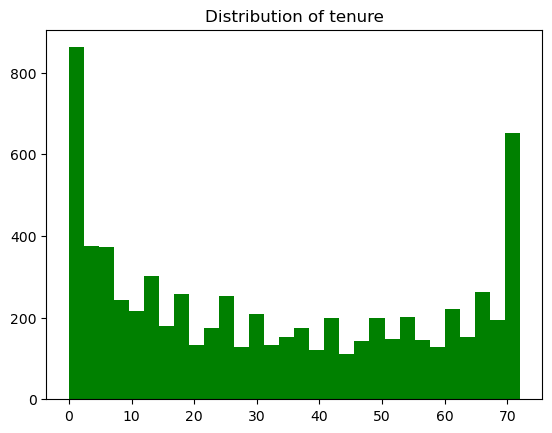

In [31]:
plt.hist(df['tenure'],color='green',bins=30)
plt.title("Distribution of tenure")

Text(0.5, 1.0, 'Distribution of tenure')

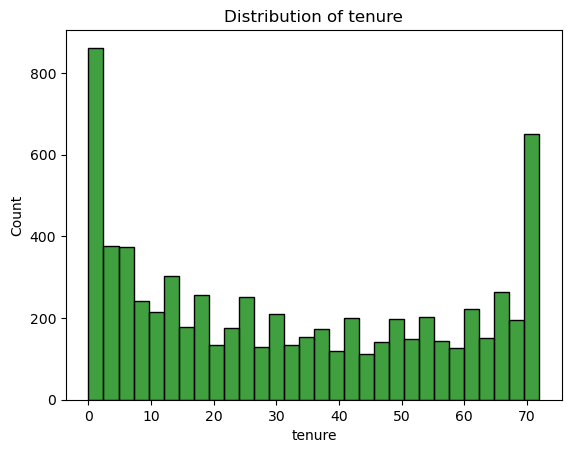

In [32]:
sns.histplot(df['tenure'],color='green',bins=30)
plt.title("Distribution of tenure")

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

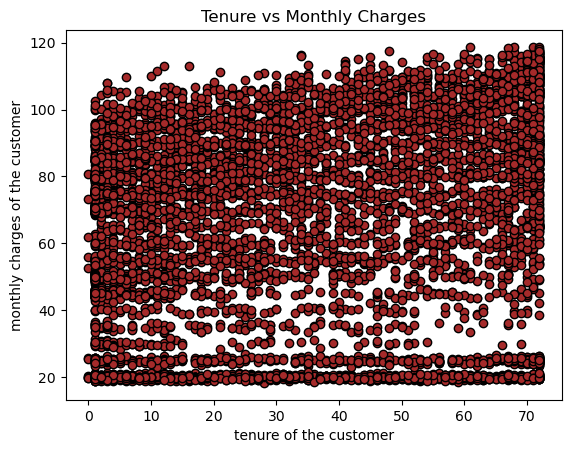

In [34]:
plt.scatter(x=df['tenure'],y=df['MonthlyCharges'],color='brown',edgecolor='black')
plt.xlabel("tenure of the customer")
plt.ylabel("monthly charges of the customer")
plt.title("Tenure vs Monthly Charges")

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

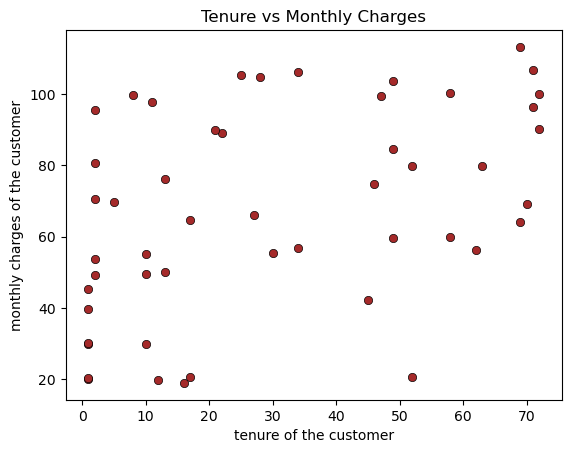

In [36]:
sns.scatterplot(x=df['tenure'].head(50),y=df['MonthlyCharges'].head(50),color='brown',edgecolor='black')
plt.xlabel("tenure of the customer")
plt.ylabel("monthly charges of the customer")
plt.title("Tenure vs Monthly Charges")

C:\Users\Dell\AppData\Local\Temp\ipykernel_24592\4274940075.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

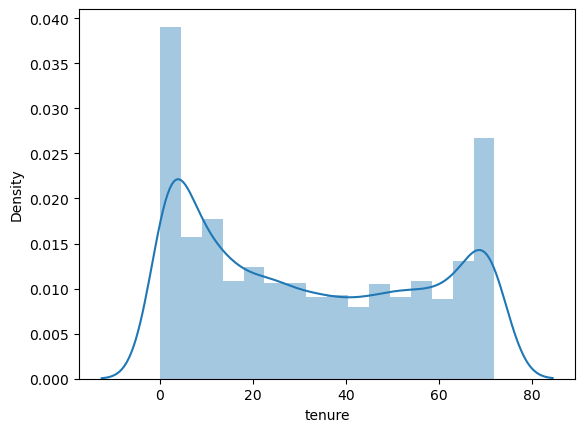

In [38]:
sns.distplot(df['tenure'])

Build a box-plot between ‘tenure’ & ‘Contract’. 
Map ‘tenure’ on they-axis & ‘Contract’ on the x-axis.

<Axes: xlabel='Contract', ylabel='tenure'>

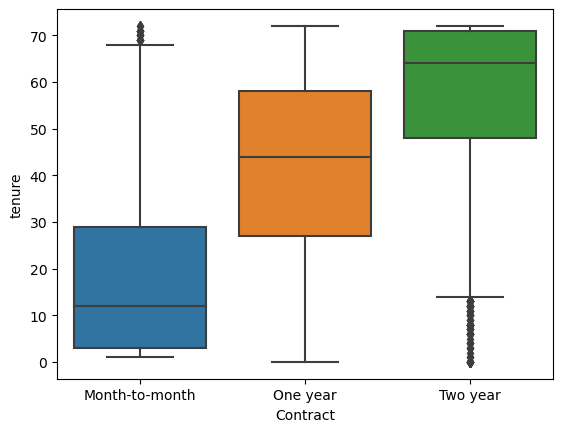

In [39]:
sns.boxplot(x='Contract',y='tenure',data=df)


# 3. Linear Regression:

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
x=df.loc[:,['tenure']]  #indepedent
y=df.loc[:,['MonthlyCharges']]  #dependent

In [42]:
x

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [43]:
y

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [46]:
#buidling the model
lin_reg = LinearRegression()

In [47]:
#training the model---->fit()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [48]:
#predict/test the model----->predict()
y_pred = lin_reg.predict(x_test)

In [49]:
y_pred

array([[55.10659011],
       [67.43520921],
       [70.82557946],
       ...,
       [73.29130328],
       [60.96268418],
       [61.57911514]])

In [50]:
from sklearn.metrics import *

In [51]:
mse = mean_squared_error(y_test,y_pred)

In [52]:
mse

845.6091871095869

In [53]:
rmse = np.sqrt(mse)
rmse

29.07936015646814

In [55]:
#simple logistic regression

In [56]:
x=df.loc[:,['MonthlyCharges']]
y=df.loc[:,['Churn']]

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=0)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
simple_log = LogisticRegression()

In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
simple_log.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred = simple_log.predict(x_test)

In [65]:
#confustion matrix

cm=confusion_matrix(y_test,y_pred)

In [66]:
cm

array([[1815,    0],
       [ 651,    0]], dtype=int64)

In [69]:
accuracy_score(y_test,y_pred)*100

73.60097323600974

In [68]:
#73%

In [70]:
#multiple logistic regression

In [71]:
x=df.loc[:,['tenure','MonthlyCharges']]
y=df.loc[:,['Churn']]

In [72]:
x

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [73]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [75]:
multiple_log = LogisticRegression()

In [76]:
multiple_log.fit(x_train,y_train)

LogisticRegression()

In [77]:
y_pred=multiple_log.predict(x_test)

In [78]:
cm=confusion_matrix(y_test,y_pred)

In [80]:
cm

array([[934, 107],
       [212, 156]], dtype=int64)

In [81]:
accuracy_score(y_test,y_pred)*100

77.35982966643009

In [82]:
x=df.loc[:,['tenure']]
y=df.loc[:,['Churn']]

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dec_tree = DecisionTreeClassifier()

In [87]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
y_pred=dec_tree.predict(x_test)

In [89]:
confusion_matrix(y_test,y_pred)

array([[965,  76],
       [281,  87]], dtype=int64)

In [90]:
accuracy_score(y_test,y_pred)*100

74.66288147622427

In [91]:
x=df.loc[:,['tenure','MonthlyCharges']]
y=df.loc[:,['Churn']]

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rand_for = RandomForestClassifier()

In [95]:
rand_for.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
y_pred = rand_for.predict(x_test)

In [97]:
confusion_matrix(y_test,y_pred)

array([[1343,  217],
       [ 321,  232]], dtype=int64)

In [98]:
accuracy_score(y_test,y_pred)*100

74.53857075248462

Multiple logistic regression is the good fit for this data